In [1]:
%matplotlib inline

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import histlite as hl
import csky as cy
import os

import matplotlib as mpl
mpl.style.use('/home/apizzuto/Nova/python3/scripts/novae_plots_nb.mplstyle')
#palette = sns.color_palette('Dark2')
palette = sns.color_palette('Paired')

In [3]:
def conv_ref_en(fl, e1, e0, gamma):
    return np.asarray(fl) * (e1/e0)**(2.-gamma)

In [4]:
np.linspace(-90., 90., 19)

array([-90., -80., -70., -60., -50., -40., -30., -20., -10.,   0.,  10.,
        20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.])

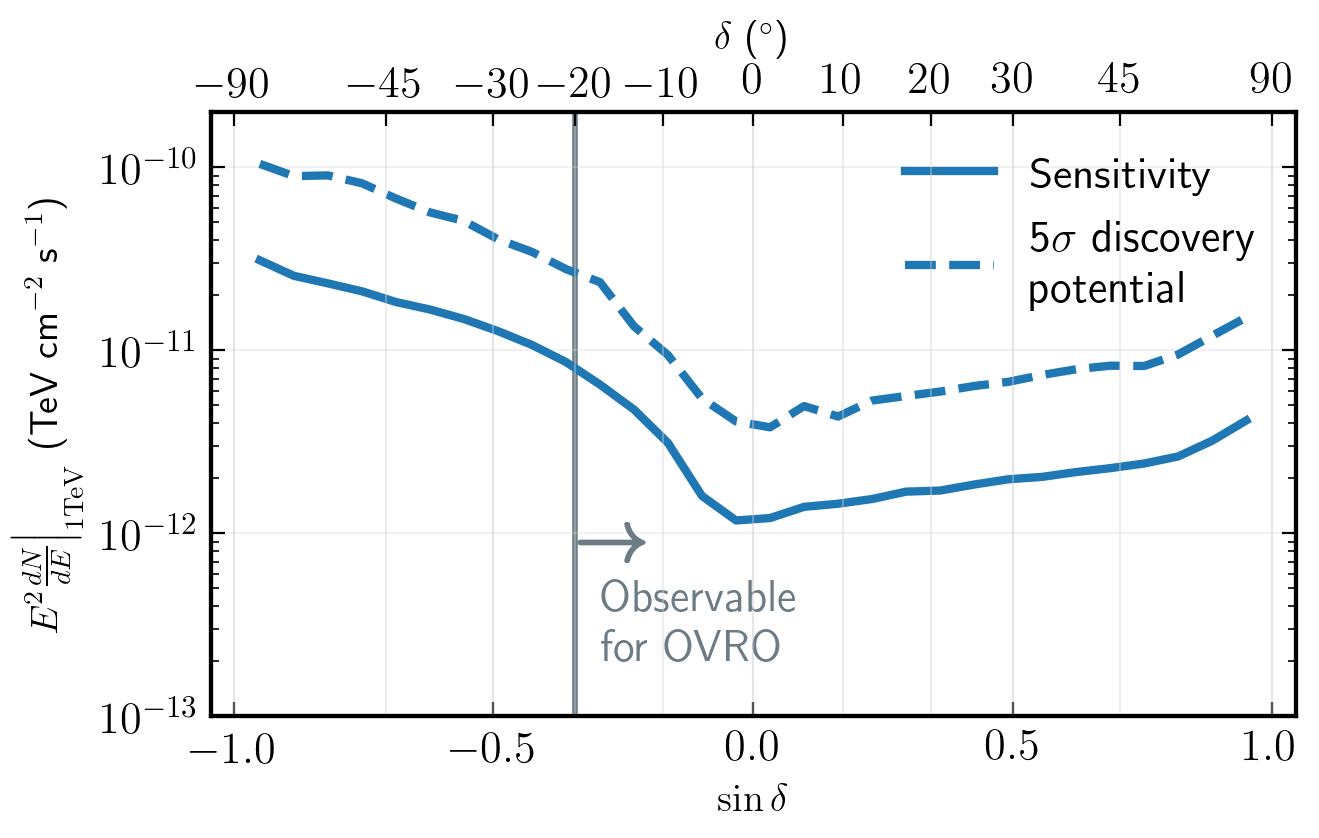

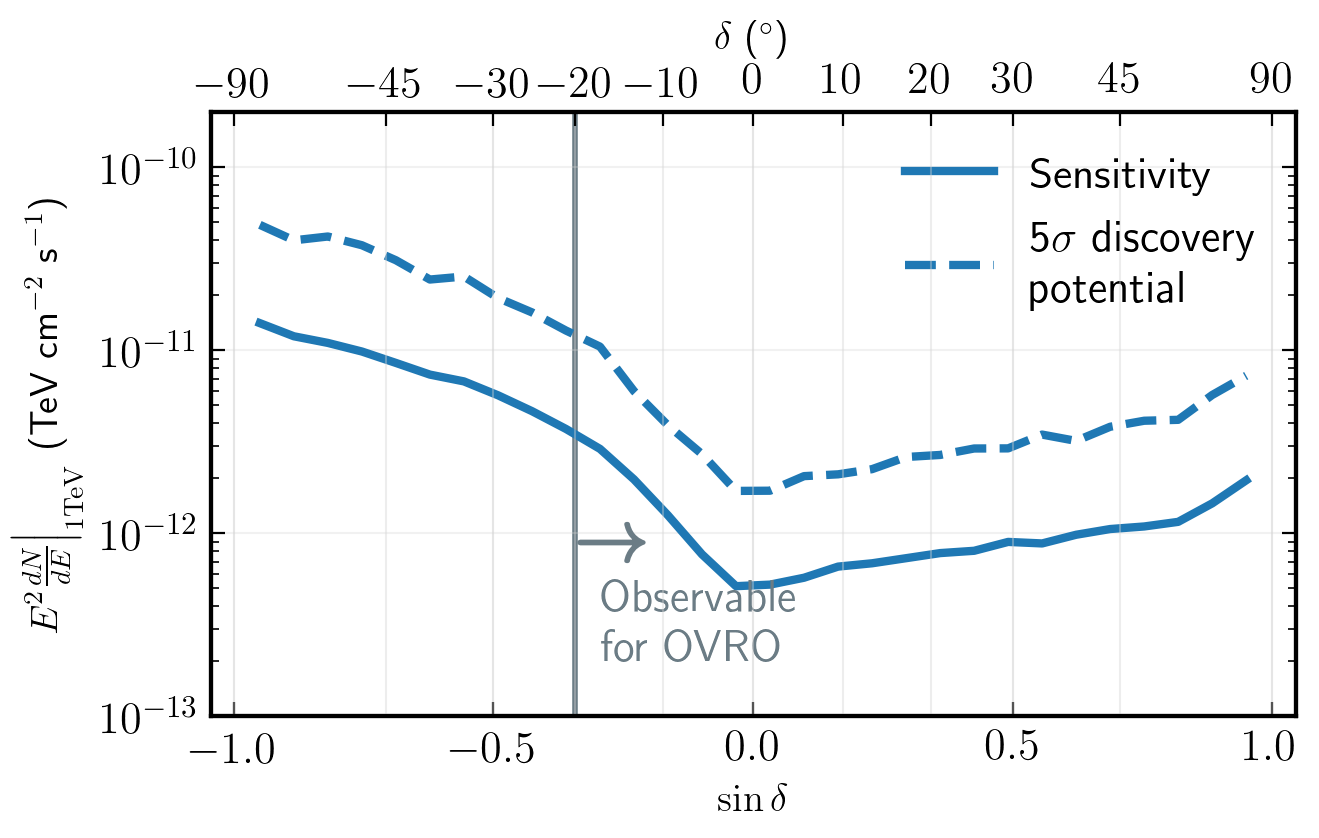

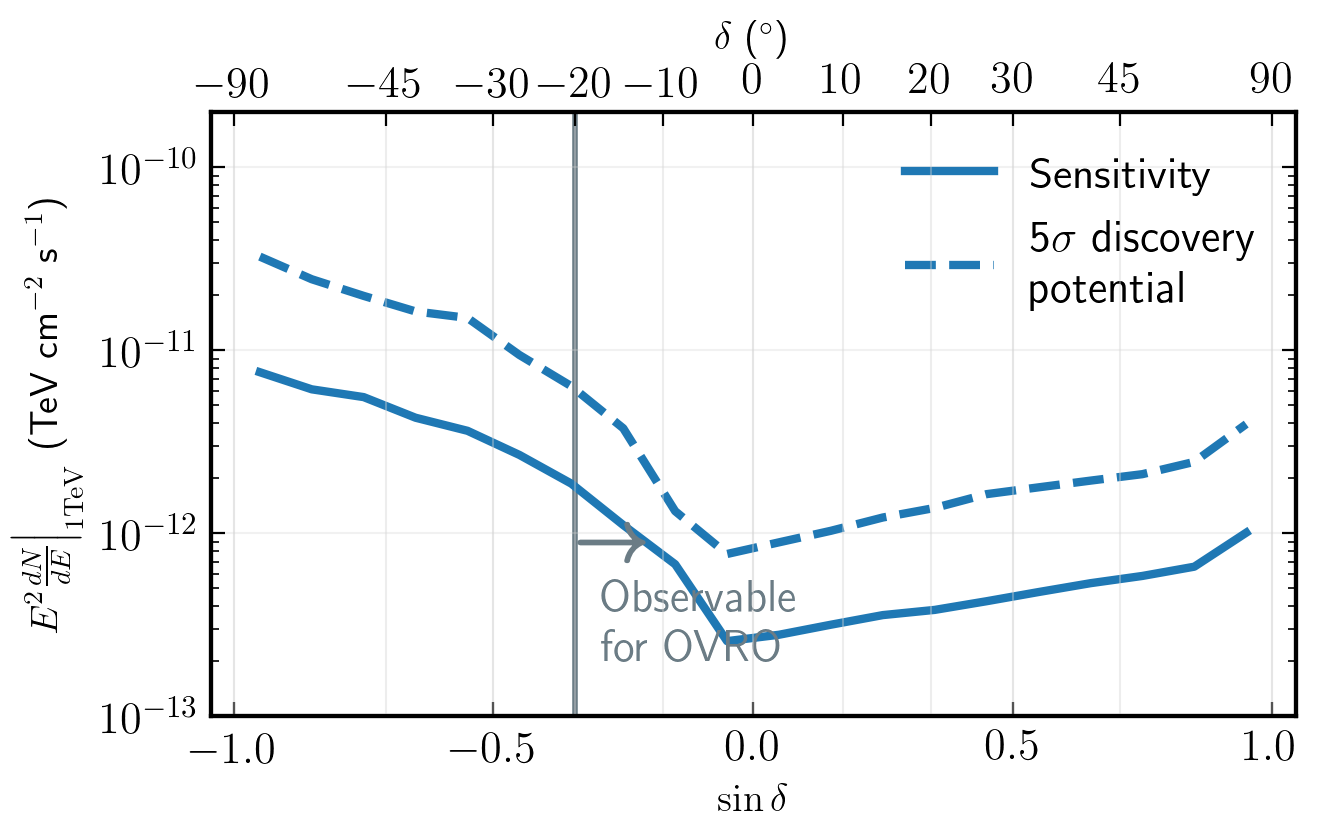

In [14]:
inj_gamma = [2.0]

for dataset_time, title in zip(['one_year', 'three_years', 'eight_years'], 
                               ['one year', 'three year', 'eight year']):
    if dataset_time == 'eight_years':
        with open('./gfu_offline_sens_100tev.pkl', 'rb') as f:
            all_gamma_results = pickle.load(f)
        sinDecs = np.r_[-0.95:0.95:20j]
    else:
        with open('./gfu_offline_sens_100tev_ovro_proposal_{}.pkl'.format(dataset_time), 'rb') as f:
            all_gamma_results = pickle.load(f)
        sinDecs = np.r_[-0.95:0.95:30j]

    fig, ax = plt.subplots(dpi=200, figsize=(7,4))
    fig.set_facecolor('w')
    for ii, gamma in enumerate(inj_gamma):
        one_tev_sens = conv_ref_en(all_gamma_results[gamma]['sens_e2dnde'], 1., 100., gamma)
        one_tev_disc = conv_ref_en(all_gamma_results[gamma]['disc_e2dnde'], 1., 100., gamma)
        ax.plot(all_gamma_results[gamma]['sindec'], one_tev_sens,
                color=palette[2*ii+1], lw=3., ls='-', label='Sensitivity')
        ax.plot(all_gamma_results[gamma]['sindec'], one_tev_disc,
                color=palette[2*ii+1], lw=3., ls='--', label=r'5$\sigma$ discovery' + '\n potential')

    ovro_crit_dec = np.sin(-20.*np.pi/180.)
    ax.axvline(ovro_crit_dec, lw=2., color=sns.xkcd_rgb['battleship grey'], zorder=1)
    # plt.arrow(ovro_crit_dec+0.5, 1e-12, 0.01, 1e-16, 
    #           color=sns.xkcd_rgb['battleship grey'],
    #           head_width=0.0, head_length=0.0)
    ax.text(ovro_crit_dec+0.05, 2e-13, 'Observable \n for OVRO', color=sns.xkcd_rgb['battleship grey'])
    ax.plot(ovro_crit_dec+0.065,9e-13, marker=r'$\rightarrow$', 
             markersize=25, color=sns.xkcd_rgb['battleship grey'])
    ax.grid(which = 'major', alpha = 0.3)
    ax.tick_params(direction = 'in')
    
    ax2 = ax.twiny()
    newlabel = [r'$-90$', r'$-45$',  r'$-30$', r'$-20$', 
                r'$-10$', r'$0$', r'$10$',  r'$20$', r'$30$',  r'$45$', 
                r'$90$']                # labels of the xticklabels: the position in the new x-axis
    newpos = np.sin(np.radians(np.array([-90., -45.,  -30., -20., 
                -10., 0., 10., 20., 30., 45.,  
                90.])))
    #newpos   = [np.sin(np.radians(t)) for t in newlabel]   # position of the xticklabels in the old x-axis
    ax2.set_xticks(newpos)
    ax2.set_xticklabels(newlabel)
    ax2.set_xlabel(r'$\delta$ ($^{\circ}$)', fontsize=14)
    ax2.set_xlim(ax.get_xlim())
    ax2.tick_params(direction = 'in')

    ax.set_ylim(1e-13, 2e-10)
    ax.legend(loc=1, frameon=False)
    ax.set_yscale('log')
    #ax0.set_ylim(2e-13, 1e-7)
    ax.set_ylabel(r'$E^2\frac{dN}{dE}\bigg|_{\mathrm{1 TeV}}$ (TeV cm$^{-2}$ s$^{-1}$)', fontsize=14)
    ax.set_xlabel(r'$\sin \delta$', fontsize=14)
    #fig.suptitle(r"IceCube {} ".format(title) + r"$E^{-2}$ sensitivity", fontsize=16, y=0.94)
    for ftype in ['pdf', 'png']:
        plt.savefig('./dump/GFU_sensitivity_{}_ovro_proposal.{}'.format(dataset_time, ftype),
                   bbox_inches='tight', dpi=200)
    plt.show()